# PRÁCTICA TECNOLOGÍAS DE GESTIÓN DE LA INFORMACIÓN

Práctica hecha por:
 - Mendorito
 - Jesi
 
Esto es un texto de **prueba** para _ver_ cómo va este _**texto**_

<a href=#bookmark>Ir al comienzo de la libreta</a>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
electricity_prices = pd.read_csv("energy_data/electricity_prices_household.csv", delimiter=";")
electricity_prices.shape

#tomamos solo las filas que contengan lo que nos interesa: datos de españa, precios sin tasas añadidas y el precio representado en euros
es_electricity = electricity_prices.loc[(electricity_prices['geo\\time'] == 'ES') & (electricity_prices['tax'] == 'X_TAX') & (electricity_prices['currency'] == 'EUR')]


In [13]:
es_electricity.head()

,product,consom,unit,tax,currency,geo\time,2019S1,2018S2,2018S1,2017S2,...,2011S2,2011S1,2010S2,2010S1,2009S2,2009S1,2008S2,2008S1,2007S2,2007S1
139,6000,4161901,KWH,X_TAX,EUR,ES,0.5166,0.4485,0.4680,0.4479,...,0.3044,0.2890,0.2926,0.3174,0.2611,0.2540,0.2622,0.2455,0.2424,:
520,6000,4161902,KWH,X_TAX,EUR,ES,0.2355,0.2393,0.2303,0.2113,...,0.1870,0.1768,0.1681,0.1622,0.1571,0.1459,0.1475,0.1299,0.1332,:
901,6000,4161903,KWH,X_TAX,EUR,ES,0.1889,0.1947,0.1873,0.1712,...,0.1684,0.1597,0.1492,0.1417,0.1381,0.1294,0.1277,0.1124,0.1152,:
1282,6000,4161904,KWH,X_TAX,EUR,ES,0.1608,0.1697,0.1513,0.1482,...,0.1563,0.1426,0.1363,0.1271,0.1266,0.1203,0.1219,0.1021,0.1058,:
1663,6000,4161905,KWH,X_TAX,EUR,ES,0.1409,0.1414,0.1236,0.1311,...,0.1444,0.1251,0.1244,0.1174,0.1153,0.1163,0.1148,0.0981,0.0976,:


In [14]:
# eliminamos la columna correspondiente al primer semestre de 2007,
# ya que no hay datos de esa época
es_electricity = es_electricity.drop(columns="2007S1")

# le damos la vuelta porque los años están dispuestos del revés
# generamos la x que pondremos abajo en nuestra gráfica
x = np.flip(es_electricity.columns[6:].to_numpy())

# convertimos el DataFrame de pandas a un numpy array para manipularlo más fácilmente
nparray = es_electricity.to_numpy()

# hacemos lo mismo que con la x, pero con la y
y1 = np.flip(nparray[0, 6:])
y2 = np.flip(nparray[1, 6:])
y3 = np.flip(nparray[2, 6:])
y4 = np.flip(nparray[3, 6:])
y5 = np.flip(nparray[4, 6:])

# el siguiente paso es castearlos a un tipo flotante,
# así que nos aseguramos de que los valores no numéricos
# no existan

y1[y1 == ': '] = -1
y2[y2 == ': '] = -1
y3[y3 == ': '] = -1
y4[y4 == ': '] = -1
y5[y5 == ': '] = -1

# convertimos el array a float, ya que hasta ahora era
# un array de strings
y1 = y1.astype(float)
y2 = y2.astype(float)
y3 = y3.astype(float)
y4 = y4.astype(float)
y5 = y5.astype(float)


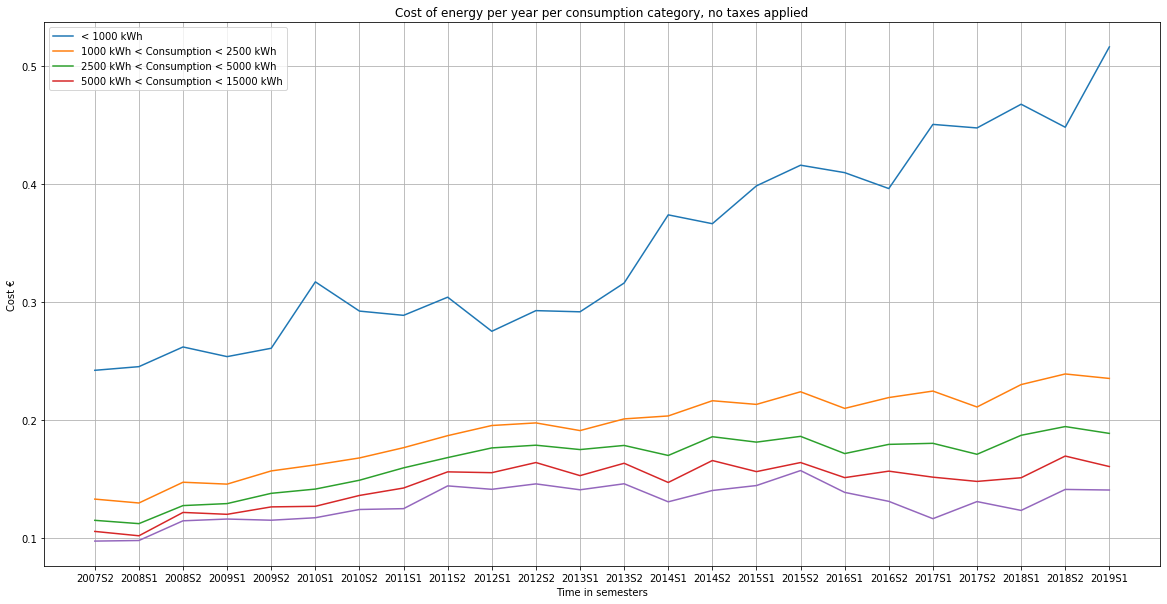

In [15]:
plt.figure(figsize=(20,10))
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.plot(x, y4)
plt.plot(x, y5)

legend = ["< 1000 kWh", "1000 kWh < Consumption < 2500 kWh","2500 kWh < Consumption < 5000 kWh","5000 kWh < Consumption < 15000 kWh",]
plt.legend(legend)

plt.ylabel('Cost €')
plt.xlabel('Time in semesters')

plt.title("Cost of energy per year per consumption category, no taxes applied")
plt.grid(True)
plt.show()

In [16]:
elec_melt = electricity_prices.melt(
    id_vars=['product', 'consom', 'unit', 'tax', 'currency', 'geo\\time'],
    var_name='semester',
    value_name='cost'
)

elec_melt.head()

,product,consom,unit,tax,currency,geo\time,semester,cost
0,6000,4161901,KWH,I_TAX,EUR,AL,2019S1,:
1,6000,4161901,KWH,I_TAX,EUR,AT,2019S1,0.3796
2,6000,4161901,KWH,I_TAX,EUR,BA,2019S1,0.2090
3,6000,4161901,KWH,I_TAX,EUR,BE,2019S1,0.4742
4,6000,4161901,KWH,I_TAX,EUR,BG,2019S1,0.1014


In [17]:
es_melt = elec_melt[elec_melt['geo\\time'] == 'ES']
es_melt.head()

,product,consom,unit,tax,currency,geo\time,semester,cost
12,6000,4161901,KWH,I_TAX,EUR,ES,2019S1,0.6570
56,6000,4161901,KWH,I_TAX,NAT,ES,2019S1,0.6570
100,6000,4161901,KWH,I_TAX,PPS,ES,2019S1,0.7183
139,6000,4161901,KWH,X_TAX,EUR,ES,2019S1,0.5166
183,6000,4161901,KWH,X_TAX,NAT,ES,2019S1,0.5166


In [18]:
renewable = pd.read_csv("energy_data/share_renewable.csv");
renewable.head()

,TIME,GEO,NRG_BAL,UNIT,Value,Flag and Footnotes
0,2008,European Union - 28 countries,Renewable energy sources,Percentage,11.325,NaN
1,2008,Belgium,Renewable energy sources,Percentage,3.591,NaN
2,2008,Bulgaria,Renewable energy sources,Percentage,10.492,NaN
3,2008,Czechia,Renewable energy sources,Percentage,8.626,NaN
4,2008,Denmark,Renewable energy sources,Percentage,18.564,NaN


In [19]:
es_renewable = renewable[renewable['GEO'] == 'Spain']
es_renewable.head()

,TIME,GEO,NRG_BAL,UNIT,Value,Flag and Footnotes
9,2008,Spain,Renewable energy sources,Percentage,10.737,NaN
46,2009,Spain,Renewable energy sources,Percentage,12.963,NaN
83,2010,Spain,Renewable energy sources,Percentage,13.810,NaN
120,2011,Spain,Renewable energy sources,Percentage,13.224,NaN
157,2012,Spain,Renewable energy sources,Percentage,14.286,NaN


In [20]:
renewable['GEO'].drop_duplicates()

0                         European Union - 28 countries
1                                               Belgium
2                                              Bulgaria
3                                               Czechia
4                                               Denmark
5      Germany (until 1990 former territory of the FRG)
6                                               Estonia
7                                               Ireland
8                                                Greece
9                                                 Spain
10                                               France
11                                              Croatia
12                                                Italy
13                                               Cyprus
14                                               Latvia
15                                            Lithuania
16                                           Luxembourg
17                                              

In [21]:
x = es_renewable.TIME
y = es_renewable.Value

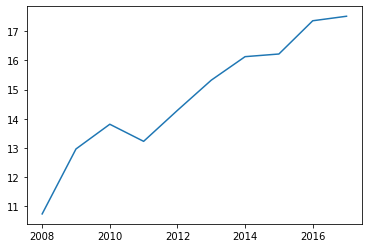

In [22]:
plt.plot(x, y)
plt.show()

In [23]:
supply_consumption = pd.read_csv("energy_data/supply_consumption_renewables.csv")
supply_consumption.head()

,TIME,GEO,NRG_BAL,SIEC,UNIT,Value,Flag and Footnotes
0,2008,European Union - 28 countries,Inland consumption - calculated,Geothermal,Terajoule,235 262.865,NaN
1,2008,European Union - 28 countries,Inland consumption - calculated,Solar thermal,Terajoule,46 004.286,NaN
2,2008,European Union - 28 countries,Inland consumption - calculated,Primary solid biofuels,Terajoule,3 268 114.691,NaN
3,2008,European Union - 28 countries,Inland consumption - calculated,Biogases,Terajoule,280 015.181,NaN
4,2008,European Union - 28 countries,Inland consumption - calculated,Renewable municipal waste,Terajoule,303 233.213,NaN


In [24]:
es_supply = supply_consumption[supply_consumption['GEO'] == 'Spain']
es_supply.head()

,TIME,GEO,NRG_BAL,SIEC,UNIT,Value,Flag and Footnotes
50,2008,Spain,Inland consumption - calculated,Geothermal,Terajoule,459.000,NaN
51,2008,Spain,Inland consumption - calculated,Solar thermal,Terajoule,5 378.234,NaN
52,2008,Spain,Inland consumption - calculated,Primary solid biofuels,Terajoule,176 143.000,NaN
53,2008,Spain,Inland consumption - calculated,Biogases,Terajoule,8 660.000,NaN
54,2008,Spain,Inland consumption - calculated,Renewable municipal waste,Terajoule,13 735.000,NaN


In [25]:
es_supply = es_supply.reset_index()
categories = es_supply.SIEC

In [26]:
categories.head()

0                   Geothermal
1                Solar thermal
2       Primary solid biofuels
3                     Biogases
4    Renewable municipal waste
Name: SIEC, dtype: object

In [27]:
categories = categories.drop_duplicates()

In [28]:
categories

0                   Geothermal
1                Solar thermal
2       Primary solid biofuels
3                     Biogases
4    Renewable municipal waste
Name: SIEC, dtype: object

In [29]:
x = es_supply.TIME
x = x.drop_duplicates()

- Formateamos las celdas para que sean de tipo flotante:

In [57]:
yGeo = es_supply[es_supply['SIEC'] == categories.get(0)].Value
yGeo = yGeo.astype(float)

ySol = es_supply[es_supply['SIEC'] == categories.get(1)].Value
ySol = (ySol.str.replace(" ", "")).astype(float)

yBio = es_supply[es_supply['SIEC'] == categories.get(2)].Value
yBio = (yBio.str.replace(" ", "")).astype(float)

yGas = es_supply[es_supply['SIEC'] == categories.get(3)].Value
yGas = (yGas.str.replace(" ", "")).astype(float)

yWaste = es_supply[es_supply['SIEC'] == categories.get(4)].Value
yWaste = (yWaste.str.replace(" ", "")).astype(float)

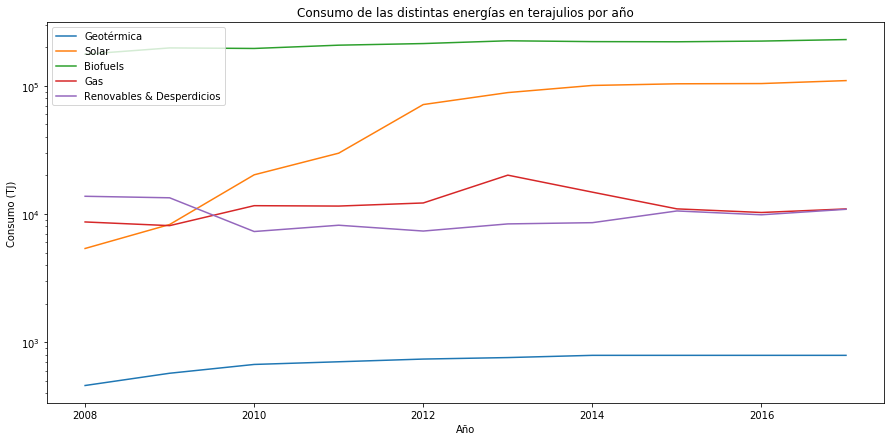

In [31]:
plt.figure(figsize=(15, 7))
plt.plot(x, yGeo, x, ySol, x, yBio, x, yGas, x, yWaste)
plt.xlabel('Año')
plt.ylabel('Consumo (TJ)')
plt.title('Consumo de las distintas energías en terajulios por año')
plt.yscale('log')
plt.legend(['Geotérmica', 'Solar', 'Biofuels', 'Gas', 'Renovables & Desperdicios'])
plt.show()

In [32]:
energy_prod = pd.read_csv("energy_data/energy_productivity.csv", delimiter=';')
energy_supp = pd.read_csv("energy_data/energy_supply.csv", delimiter=';')
energy_cons = pd.read_csv("energy_data/consumo_todas_energias.csv", delimiter=';')

In [33]:
energy_prod.head()

,Unnamed: 0,freq,unit,geo\TIME_PERIOD,2000,2001,2002,2003,2004,2005,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,AL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,A,EUR_KGOE,AL,2.831,3.003,2.842,3.063,2.945,3.091,...,3.922,3.995,4.180,4.109,4.625,3.961,4.048,4.429,4.445,4.385
2,NaN,A,PPS_KGOE,AL,5.658,6.059,5.864,6.314,6.205,6.670,...,8.956,9.040,9.973,9.964,11.405,9.424,10.093,11.372,10.867,10.907
3,AT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,A,EUR_KGOE,AT,8.691,8.341,8.430,8.086,8.152,8.100,...,8.881,9.007,8.609,9.121,9.239,9.028,9.384,9.318,9.432,9.486


In [34]:
energy_prod_es = energy_prod[energy_prod['geo\\TIME_PERIOD'] == 'ES']
energy_prod_es

,Unnamed: 0,freq,unit,geo\TIME_PERIOD,2000,2001,2002,2003,2004,2005,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
37,NaN,A,EUR_KGOE,ES,6.649,6.711,6.717,6.703,6.620,6.706,...,7.424,7.757,7.785,7.732,7.537,7.956,8.186,8.201,8.372,8.271
38,NaN,A,PPS_KGOE,ES,5.864,6.040,6.271,6.273,6.367,6.721,...,8.050,8.198,8.195,8.171,8.204,8.700,9.133,9.344,9.391,9.318


In [35]:
energy_prod_es = energy_prod_es.melt(
    id_vars=['Unnamed: 0', 'freq', 'unit', 'geo\\TIME_PERIOD'],
    var_name='YEAR',
    value_name='production'
)

energy_prod_es.head()

,Unnamed: 0,freq,unit,geo\TIME_PERIOD,YEAR,production
0,NaN,A,EUR_KGOE,ES,2000,6.649
1,NaN,A,PPS_KGOE,ES,2000,5.864
2,NaN,A,EUR_KGOE,ES,2001,6.711
3,NaN,A,PPS_KGOE,ES,2001,6.040
4,NaN,A,EUR_KGOE,ES,2002,6.717


In [36]:
energy_prod_es.production = (energy_prod_es.production).str.replace(".", "")
energy_prod_es.production[energy_prod_es.production == 'NaN'] = 1
energy_prod_es.production = pd.to_numeric(energy_prod_es.production)

In [37]:
share_renewable = pd.read_csv("energy_data/share_renewable.csv")

In [38]:
share_renewable.head()

,TIME,GEO,NRG_BAL,UNIT,Value,Flag and Footnotes
0,2008,European Union - 28 countries,Renewable energy sources,Percentage,11.325,NaN
1,2008,Belgium,Renewable energy sources,Percentage,3.591,NaN
2,2008,Bulgaria,Renewable energy sources,Percentage,10.492,NaN
3,2008,Czechia,Renewable energy sources,Percentage,8.626,NaN
4,2008,Denmark,Renewable energy sources,Percentage,18.564,NaN


In [39]:
share_renewable.Value = pd.to_numeric(share_renewable.Value)

In [40]:
share_renewable_es = share_renewable[share_renewable['GEO'] == 'Spain']

In [41]:
share_renewable_es

,TIME,GEO,NRG_BAL,UNIT,Value,Flag and Footnotes
9,2008,Spain,Renewable energy sources,Percentage,10.737,NaN
46,2009,Spain,Renewable energy sources,Percentage,12.963,NaN
83,2010,Spain,Renewable energy sources,Percentage,13.810,NaN
120,2011,Spain,Renewable energy sources,Percentage,13.224,NaN
157,2012,Spain,Renewable energy sources,Percentage,14.286,NaN
194,2013,Spain,Renewable energy sources,Percentage,15.320,NaN
231,2014,Spain,Renewable energy sources,Percentage,16.126,NaN
268,2015,Spain,Renewable energy sources,Percentage,16.217,NaN
305,2016,Spain,Renewable energy sources,Percentage,17.356,NaN
342,2017,Spain,Renewable energy sources,Percentage,17.511,NaN


Text(0.5, 1.0, 'Evolution of use of renewable energies over time')

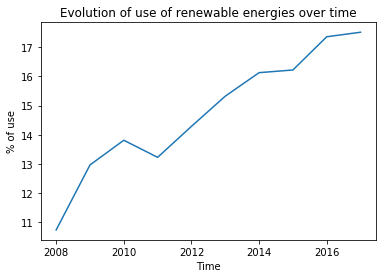

In [42]:
plt.plot(share_renewable_es.TIME, share_renewable_es.Value)
plt.xlabel('Time')
plt.ylabel('% of use')
plt.title('Evolution of use of renewable energies over time')

# ////////////// COMIENZO DE LA LIBRETA //////////////

#### Importamos las librerías necesarias...

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
electricity_prices_household = pd.read_csv("energy_data/electricity_prices_household.csv", delimiter=';')
gas_prices_household = pd.read_csv("energy_data/gas_prices_household.csv", delimiter=';')
consumo_energias_sector = pd.read_csv("energy_data/consumo_energias_sector.csv", delimiter=';')
energy_supply = pd.read_csv("energy_data/energy_supply.csv", delimiter=';')
energy_productivity = pd.read_csv("energy_data/energy_productivity.csv", delimiter=';')

#### Definición de funciones útiles

In [3]:
def consulta_por_valor_columna(dataframe, valor, nombre_columna):
    return dataframe[dataframe[nombre_columna] == valor]

In [4]:
def crear_grafica(x_data, y_data, titulo, x_label, y_label):
    plt.plot(x_data, y_data)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(titulo)

In [5]:
def castear_a_float(input_list):
    '''Recibe una lista de valores y devuelve otra con los valores interpretados como flotantes.
    Esta función NO edita la columna, devuelve una nueva. La columna del dataframe original deberá ser sobreescrita pertinentemente.
    ''' 
    return input_list.apply(float)

In [6]:
def string_replace_columna(columna, valor_a_buscar, valor_sustituto):
    '''Busca espacios en la columna y los elimina
    Esta función NO edita la columna, devuelve una nueva. La columna del dataframe original deberá ser sobreescrita pertinentemente.
    '''
    return columna.str.replace(valor_a_buscar, valor_sustituto)

In [7]:
def eliminar_valores_invalidos(dataframe, columna, valor_invalido, valor_nuevo):
    '''Sustituye las instancias de valor_invalido por las de valor nuevo en la columna. Por ejemplo, para sustituir \':\' por -1
    Es recomendable pasar el valor nuevo como tipo igual al que tiene el data frame, para que luego los casteos no se hagan complicados
    '''
    dataframe.loc[dataframe[columna] == valor_invalido, columna] = valor_nuevo

In [8]:
electricity_prices_household = electricity_prices_household.melt(
    id_vars=['product', 'consom', 'unit', 'tax', 'currency', 'geo\\time'],
    var_name='semester',
    value_name='cost'
)

#### Ejemplo de uso de las funciones:

In [9]:
eliminar_valores_invalidos(electricity_prices_household, 'cost', ': ', '-1')
eliminar_valores_invalidos(electricity_prices_household, 'cost', ': u', '-1')
electricity_prices_household.cost = string_replace_columna(electricity_prices_household.cost, 'u', "")
electricity_prices_household.cost = string_replace_columna(electricity_prices_household.cost, 'p', "")

In [10]:
electricity_prices_household.cost = castear_a_float(electricity_prices_household.cost)

In [11]:
electricity_prices_household.cost.head()

0   -1.0000
1    0.3796
2    0.2090
3    0.4742
4    0.1014
Name: cost, dtype: float64

#### Podemos ver que ahora el tipo de esa columna es flotante, no _object_ o _str_

In [12]:
supply_consumption_renewables = pd.read_csv("energy_data/supply_consumption_renewables.csv")

In [13]:
supply_consumption_renewables.head()

,TIME,GEO,NRG_BAL,SIEC,UNIT,Value,Flag and Footnotes
0,2008,European Union - 28 countries,Inland consumption - calculated,Geothermal,Terajoule,235 262.865,NaN
1,2008,European Union - 28 countries,Inland consumption - calculated,Solar thermal,Terajoule,46 004.286,NaN
2,2008,European Union - 28 countries,Inland consumption - calculated,Primary solid biofuels,Terajoule,3 268 114.691,NaN
3,2008,European Union - 28 countries,Inland consumption - calculated,Biogases,Terajoule,280 015.181,NaN
4,2008,European Union - 28 countries,Inland consumption - calculated,Renewable municipal waste,Terajoule,303 233.213,NaN


In [14]:
supply_consumption_renewables.Value = string_replace_columna(supply_consumption_renewables.Value, " ", "")

In [15]:
eliminar_valores_invalidos(supply_consumption_renewables, 'Value', ':', '-1')

eliminar_valores_invalidos(supply_consumption_renewables, 'Value', ': u', '-1')

supply_consumption_renewables.Value = string_replace_columna(supply_consumption_renewables.Value, 'p', "")

supply_consumption_renewables.Value = castear_a_float(supply_consumption_renewables.Value)

In [16]:
supply_consumption_renewables.Value.head()

0     235262.865
1      46004.286
2    3268114.691
3     280015.181
4     303233.213
Name: Value, dtype: float64

<a name='bookmark' />

## Comenzamos con el proceso de selección de los datos que nos interesan. 
#### Vamos a seleccionar en las tablas los datos correspondientes a España. Y, si hiciera falta, seleccionar la categoría más relevante, como la moneda la unidad de energía u otros.

#### Importamos las librerías necesarias y cargamos las tablas...

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
electricity_prices_household = pd.read_csv("energy_data/electricity_prices_household.csv", delimiter=';')
gas_prices_household = pd.read_csv("energy_data/gas_prices_household.csv", delimiter=';')
consumo_energias_sector = pd.read_csv("energy_data/consumo_energias_sector.csv", delimiter=';')
energy_supply = pd.read_csv("energy_data/energy_supply.csv", delimiter=';')
energy_productivity = pd.read_csv("energy_data/energy_productivity.csv", delimiter=';')

#### Definición de funciones útiles

In [3]:
def consulta_por_valor_columna(dataframe, valor, nombre_columna):
    return dataframe[dataframe[nombre_columna] == valor]

In [4]:
def crear_grafica(x_data, y_data, titulo, x_label, y_label):
    plt.plot(x_data, y_data)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(titulo)

In [5]:
def castear_a_float(input_list):
    '''Recibe una lista de valores y devuelve otra con los valores interpretados como flotantes.
    Esta función NO edita la columna, devuelve una nueva. La columna del dataframe original deberá ser sobreescrita pertinentemente.
    ''' 
    return input_list.apply(float)

In [6]:
def string_replace_columna(columna, valor_a_buscar, valor_sustituto):
    '''Busca espacios en la columna y los elimina
    Esta función NO edita la columna, devuelve una nueva. La columna del dataframe original deberá ser sobreescrita pertinentemente.
    '''
    return columna.str.replace(valor_a_buscar, valor_sustituto)

In [7]:
def eliminar_valores_invalidos(dataframe, columna, valor_invalido, valor_nuevo):
    '''Sustituye las instancias de valor_invalido por las de valor nuevo en la columna. Por ejemplo, para sustituir \':\' por -1
    Es recomendable pasar el valor nuevo como tipo igual al que tiene el data frame, para que luego los casteos no se hagan complicados
    '''
    dataframe.loc[dataframe[columna] == valor_invalido, columna] = valor_nuevo

##### Seleccionamos las columnas referentes a nuestro país...

In [8]:
electricity_prices_household_es = consulta_por_valor_columna(electricity_prices_household, 'ES', 'geo\\time')
gas_prices_household_es = consulta_por_valor_columna(gas_prices_household, 'ES', 'geo\\time')
consumo_energias_sector_es = consulta_por_valor_columna(consumo_energias_sector, 'ES', 'geo\TIME_PERIOD')

##### Seleccionamos la moneda y las unidades relevantes...

In [9]:
electricity_prices_household_es_eur = consulta_por_valor_columna(electricity_prices_household_es, 'EUR', 'currency')
electricity_prices_household_es_eur_xtax = consulta_por_valor_columna(electricity_prices_household_es_eur, 'X_TAX', 'tax')


gas_prices_household_es_eur = consulta_por_valor_columna(gas_prices_household_es, 'EUR', 'currency')
gas_prices_household_es_eur_xtax = consulta_por_valor_columna(gas_prices_household_es_eur, 'X_TAX', 'tax')


consumo_energias_sector_es_household = consulta_por_valor_columna(consumo_energias_sector_es, 'FC_OTH_HH_E', 'nrg_bal')


#### Hemos acabado el proceso de selección. Ahora tenemos 3 dataframes mucho más concretos y capaces de aportar bastante información.

##### Vamos a crear una gráfica con ellos, y a sacar algunas conclusiones de esta primera fase.

Para ello, primero debemos tratar los datos para convertir las columnas que representaremos en formato numérico.

In [10]:
electricity_prices_household_es_eur_xtax.head()

,product,consom,unit,tax,currency,geo\time,2019S1,2018S2,2018S1,2017S2,...,2011S2,2011S1,2010S2,2010S1,2009S2,2009S1,2008S2,2008S1,2007S2,2007S1
139,6000,4161901,KWH,X_TAX,EUR,ES,0.5166,0.4485,0.4680,0.4479,...,0.3044,0.2890,0.2926,0.3174,0.2611,0.2540,0.2622,0.2455,0.2424,:
520,6000,4161902,KWH,X_TAX,EUR,ES,0.2355,0.2393,0.2303,0.2113,...,0.1870,0.1768,0.1681,0.1622,0.1571,0.1459,0.1475,0.1299,0.1332,:
901,6000,4161903,KWH,X_TAX,EUR,ES,0.1889,0.1947,0.1873,0.1712,...,0.1684,0.1597,0.1492,0.1417,0.1381,0.1294,0.1277,0.1124,0.1152,:
1282,6000,4161904,KWH,X_TAX,EUR,ES,0.1608,0.1697,0.1513,0.1482,...,0.1563,0.1426,0.1363,0.1271,0.1266,0.1203,0.1219,0.1021,0.1058,:
1663,6000,4161905,KWH,X_TAX,EUR,ES,0.1409,0.1414,0.1236,0.1311,...,0.1444,0.1251,0.1244,0.1174,0.1153,0.1163,0.1148,0.0981,0.0976,:


#### El formato en el que se presenta la tabla es bastante inconveniente para procesar los datos. Vamos a unir todas las columnas referentes a los años en solo dos, una con los semestres y otra con su valor.

In [11]:
electricity_prices_household_es_eur_xtax = electricity_prices_household_es_eur_xtax.melt(
    id_vars=['product', 'consom', 'unit', 'tax', 'currency', 'geo\\time'],
    var_name='Semestres',
    value_name='Precio' 
)

electricity_prices_household_es_eur_xtax.head()

,product,consom,unit,tax,currency,geo\time,Semestres,Precio
0,6000,4161901,KWH,X_TAX,EUR,ES,2019S1,0.5166
1,6000,4161902,KWH,X_TAX,EUR,ES,2019S1,0.2355
2,6000,4161903,KWH,X_TAX,EUR,ES,2019S1,0.1889
3,6000,4161904,KWH,X_TAX,EUR,ES,2019S1,0.1608
4,6000,4161905,KWH,X_TAX,EUR,ES,2019S1,0.1409


In [12]:
gas_prices_household_es_eur_xtax = gas_prices_household_es_eur_xtax.melt(
    id_vars=['product', 'consom', 'unit', 'tax', 'currency', 'geo\\time'],
    var_name='Semestres',
    value_name='Precio' 
)

gas_prices_household_es_eur_xtax.head()

,product,consom,unit,tax,currency,geo\time,Semestres,Precio
0,4100,4141901,GJ_GCV,X_TAX,EUR,ES,2019S1,:
1,4100,4141901,KWH,X_TAX,EUR,ES,2019S1,:
2,4100,4141902,GJ_GCV,X_TAX,EUR,ES,2019S1,:
3,4100,4141902,KWH,X_TAX,EUR,ES,2019S1,:
4,4100,4141903,GJ_GCV,X_TAX,EUR,ES,2019S1,:


In [13]:
consumo_energias_sector_es_household = consumo_energias_sector_es_household.melt(
    id_vars=['freq', 'nrg_bal', 'siec', 'unit', 'geo\\TIME_PERIOD'],
    var_name='Años',
    value_name='Consumo' 
)

consumo_energias_sector_es_household.head()

,freq,nrg_bal,siec,unit,geo\TIME_PERIOD,Años,Consumo
0,A,FC_OTH_HH_E,TOTAL,KTOE,ES,2006,15629.050
1,A,FC_OTH_HH_E,TOTAL,KTOE,ES,2007,15672.903
2,A,FC_OTH_HH_E,TOTAL,KTOE,ES,2008,15542.505
3,A,FC_OTH_HH_E,TOTAL,KTOE,ES,2009,15967.814
4,A,FC_OTH_HH_E,TOTAL,KTOE,ES,2010,16964.172


#### Ahora, vamos a convertir las columnas pertinentes a flotantes.
##### Primero debemos eliminar los valores inválidos:

In [14]:
eliminar_valores_invalidos(electricity_prices_household_es_eur_xtax, 'Precio', ": ", "-1")
eliminar_valores_invalidos(electricity_prices_household_es_eur_xtax, 'Precio', ": u", "-1")

electricity_prices_household_es_eur_xtax.Precio = string_replace_columna(electricity_prices_household_es_eur_xtax.Precio, 'p', "")
electricity_prices_household_es_eur_xtax.Precio = string_replace_columna(electricity_prices_household_es_eur_xtax.Precio, " ", "")

Ahora que hemos limpiado la columna precio, podemos convertirla a ```float```.

In [15]:
electricity_prices_household_es_eur_xtax.Precio = castear_a_float(electricity_prices_household_es_eur_xtax.Precio)

electricity_prices_household_es_eur_xtax.Precio.head()

0    0.5166
1    0.2355
2    0.1889
3    0.1608
4    0.1409
Name: Precio, dtype: float64

### ¡Genial! Procedamos con las demás.

In [16]:
eliminar_valores_invalidos(gas_prices_household_es_eur_xtax, 'Precio', ": ", "-1")
eliminar_valores_invalidos(gas_prices_household_es_eur_xtax, 'Precio', ": u", "-1")

gas_prices_household_es_eur_xtax.Precio = string_replace_columna(gas_prices_household_es_eur_xtax.Precio, 'p', "")
gas_prices_household_es_eur_xtax.Precio = string_replace_columna(gas_prices_household_es_eur_xtax.Precio, " ", "")

In [17]:
gas_prices_household_es_eur_xtax.Precio = castear_a_float(gas_prices_household_es_eur_xtax.Precio)

gas_prices_household_es_eur_xtax.Precio.head()

0   -1.0
1   -1.0
2   -1.0
3   -1.0
4   -1.0
Name: Precio, dtype: float64

In [18]:
consumo_energias_sector_es_household.head()

,freq,nrg_bal,siec,unit,geo\TIME_PERIOD,Años,Consumo
0,A,FC_OTH_HH_E,TOTAL,KTOE,ES,2006,15629.050
1,A,FC_OTH_HH_E,TOTAL,KTOE,ES,2007,15672.903
2,A,FC_OTH_HH_E,TOTAL,KTOE,ES,2008,15542.505
3,A,FC_OTH_HH_E,TOTAL,KTOE,ES,2009,15967.814
4,A,FC_OTH_HH_E,TOTAL,KTOE,ES,2010,16964.172


In [19]:
consumo_energias_sector_es_household.Consumo.head()

0    15629.050
1    15672.903
2    15542.505
3    15967.814
4    16964.172
Name: Consumo, dtype: object

In [20]:
eliminar_valores_invalidos(consumo_energias_sector_es_household, 'Consumo', ": ", "-1")
eliminar_valores_invalidos(consumo_energias_sector_es_household, 'Consumo', ": u", "-1")

consumo_energias_sector_es_household.Consumo = string_replace_columna(consumo_energias_sector_es_household.Consumo, 'p', "")
consumo_energias_sector_es_household.Consumo = string_replace_columna(consumo_energias_sector_es_household.Consumo, " ", "")

In [21]:
consumo_energias_sector_es_household.Consumo = castear_a_float(consumo_energias_sector_es_household.Consumo)

consumo_energias_sector_es_household.Consumo.head()

0    15629.050
1    15672.903
2    15542.505
3    15967.814
4    16964.172
Name: Consumo, dtype: float64

### Ahora que tenemos los datos bien formateados, ¡vamos a representarlos!

##### Para representar los datos del consumo de electricidad, primero debemos agruparlos por las diferentes categorías que presentan, como el precio según la tarifa.

Primero, vamos a eliminar la columna de 2007S1, ya que, durante el proceso de análisis, nos hemos dado cuenta de que no posee ningún valor.

In [22]:
electricity_prices_household_es_eur_xtax = electricity_prices_household_es_eur_xtax[electricity_prices_household_es_eur_xtax['Semestres'] != '2007S1']

De las fuentes de datos, sabemos que los diferentes valores de la columna Consom corresponden a las diferentes facturas de electricidad. Vamos a separarlas en diferentes variables.

In [23]:
less_1k = (consulta_por_valor_columna(electricity_prices_household_es_eur_xtax, 4161901, 'consom')).Precio
from_1k_to_2k = (consulta_por_valor_columna(electricity_prices_household_es_eur_xtax, 4161902, 'consom')).Precio
from_2k_to_5k = (consulta_por_valor_columna(electricity_prices_household_es_eur_xtax, 4161903, 'consom')).Precio
from_5k_to_15k = (consulta_por_valor_columna(electricity_prices_household_es_eur_xtax, 4161904, 'consom')).Precio
over_15k = (consulta_por_valor_columna(electricity_prices_household_es_eur_xtax, 4161905, 'consom')).Precio

In [24]:
semestres_elec = (electricity_prices_household_es_eur_xtax.Semestres).drop_duplicates()

##### Como los datos están dispuestos del revés cronológicamente, vamos a darles la vuelta.

In [25]:
semestres_elec = semestres_elec.iloc[::-1]
less_1k = less_1k.iloc[::-1]
from_1k_to_2k = from_1k_to_2k.iloc[::-1] 
from_2k_to_5k = from_2k_to_5k.iloc[::-1] 
from_5k_to_15k = from_5k_to_15k.iloc[::-1]
over_15k = over_15k.iloc[::-1]

Text(0, 0.5, 'Precio €')

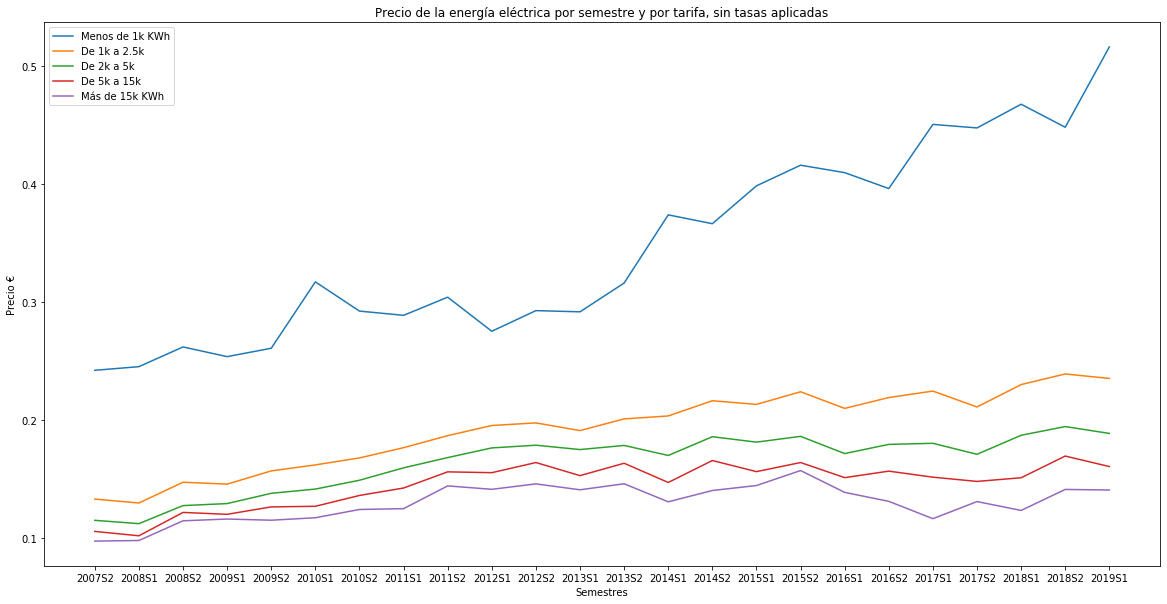

In [42]:
plt.figure(figsize=(20, 10))
plt.plot(semestres_elec, less_1k, semestres_elec, from_1k_to_2k, semestres_elec, from_2k_to_5k, semestres_elec, from_5k_to_15k, semestres_elec, over_15k)
plt.title('Precio de la energía eléctrica por semestre y por tarifa, sin tasas aplicadas')
plt.legend(['Menos de 1k KWh', 'De 1k a 2.5k', 'De 2k a 5k', 'De 5k a 15k', 'Más de 15k KWh'])
plt.xlabel('Semestres')
plt.ylabel('Precio €')

##### Ahora, los datos del precio del gas.

In [27]:
gas_prices_household_es_eur_xtax.head()

,product,consom,unit,tax,currency,geo\time,Semestres,Precio
0,4100,4141901,GJ_GCV,X_TAX,EUR,ES,2019S1,-1.0
1,4100,4141901,KWH,X_TAX,EUR,ES,2019S1,-1.0
2,4100,4141902,GJ_GCV,X_TAX,EUR,ES,2019S1,-1.0
3,4100,4141902,KWH,X_TAX,EUR,ES,2019S1,-1.0
4,4100,4141903,GJ_GCV,X_TAX,EUR,ES,2019S1,-1.0


##### Nos quedamos con los GJ (Giga Julios), que es la unidad que se utiliza de referencia.

In [28]:
gas_prices_household_es_eur_xtax_gj = consulta_por_valor_columna(gas_prices_household_es_eur_xtax, 'GJ_GCV','unit')

In [35]:
gas_prices_household_es_eur_xtax_gj = gas_prices_household_es_eur_xtax_gj[(gas_prices_household_es_eur_xtax_gj['Semestres'] != '2019S1') & (gas_prices_household_es_eur_xtax_gj['Semestres'] != '2007S1')]

In [36]:
semestres_gas = (gas_prices_household_es_eur_xtax_gj.Semestres).drop_duplicates()

In [37]:
gas_prices_household_es_eur_xtax_gj.head()

,product,consom,unit,tax,currency,geo\time,Semestres,Precio
6,4100,4141901,GJ_GCV,X_TAX,EUR,ES,2018S2,25.7334
8,4100,4141902,GJ_GCV,X_TAX,EUR,ES,2018S2,19.4281
10,4100,4141903,GJ_GCV,X_TAX,EUR,ES,2018S2,13.9205
12,4100,4141901,GJ_GCV,X_TAX,EUR,ES,2018S1,19.4699
14,4100,4141902,GJ_GCV,X_TAX,EUR,ES,2018S1,14.6187


In [38]:
less_20GJ = (consulta_por_valor_columna(gas_prices_household_es_eur_xtax_gj, 4141901, 'consom')).Precio
from_20GJ_to_200GJ = (consulta_por_valor_columna(gas_prices_household_es_eur_xtax_gj, 4141902, 'consom')).Precio
over_200GJ = (consulta_por_valor_columna(gas_prices_household_es_eur_xtax_gj, 4141903, 'consom')).Precio

In [39]:
less_20GJ = less_20GJ.iloc[::-1]
from_20GJ_to_200GJ = from_20GJ_to_200GJ.iloc[::-1]
over_200GJ = over_200GJ.iloc[::-1]
semestres_gas = semestres_gas.iloc[::-1]

Text(0, 0.5, 'Precio €')

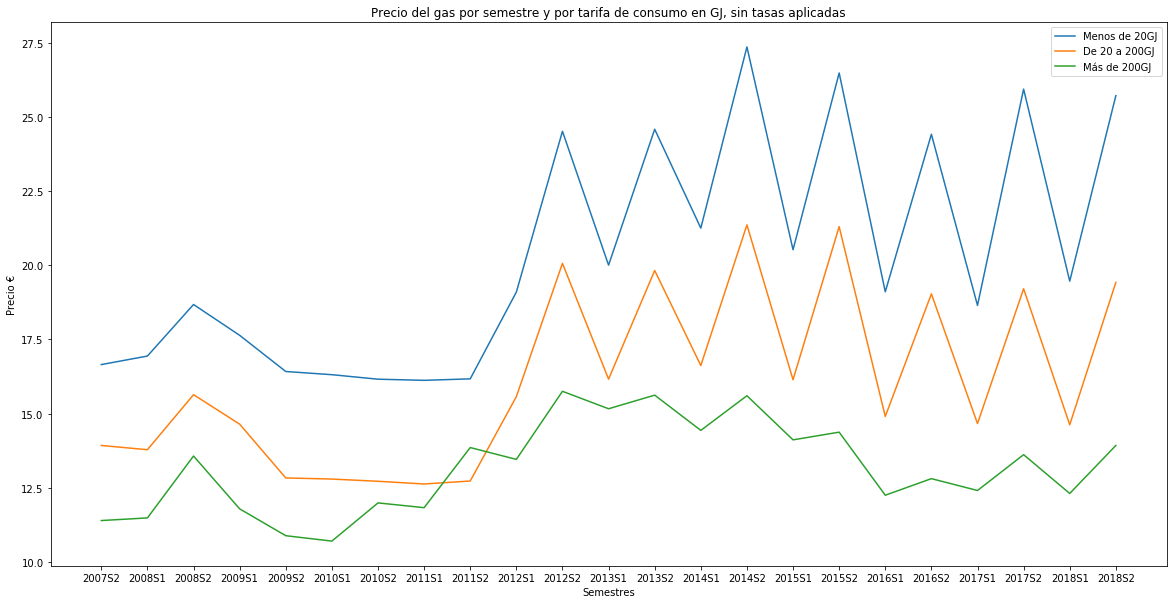

In [43]:
plt.figure(figsize=(20, 10))
plt.plot(semestres_gas, less_20GJ, semestres_gas, from_20GJ_to_200GJ, semestres_gas, over_200GJ)
plt.title('Precio del gas por semestre y por tarifa de consumo en GJ, sin tasas aplicadas')
plt.legend(['Menos de 20GJ', 'De 20 a 200GJ', 'Más de 200GJ'])
plt.xlabel('Semestres')
plt.ylabel('Precio €')

### Como vemos, el precio de ambas energías ha subido progresivamente en los últimos años. 
#### También es destacable que las tarifas más caras por unidad son aquellas que contratan menos energía. Tiene sentido, siempre que se compra de algo, cuanto más te lleves, más barato te sale por unidad.

In [58]:
less_20GJ.iloc[-1] / less_20GJ.iloc[0]

1.5453639202498197

##### El precio del gas ha subido en un 1.5, es decir, un 50% más que en 2008

In [53]:
less_1k.iloc[-1] / less_1k.iloc[0]

2.131188118811881

##### El de la electricidad ha aumentado en más de un 100%, es decir, prácticamente se ha duplicado desde 2007